In [37]:
# Import pandas for data processing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [38]:
# Read the dataset
students=pd.read_csv('studentclusters.csv')
students

,marks,shours
0,72,20.0
1,42,19.0
2,77,7.0
3,93,22.0
4,30,20.0
5,53,15.0
6,74,8.0
7,28,24.0
8,69,26.0
9,64,7.0


In [39]:
x=students.iloc[:,:-1]
x

,marks
0,72
1,42
2,77
3,93
4,30
5,53
6,74
7,28
8,69
9,64


In [40]:
y=students.iloc[:,-1:]
y

,shours
0,20.0
1,19.0
2,7.0
3,22.0
4,20.0
5,15.0
6,8.0
7,24.0
8,26.0
9,7.0


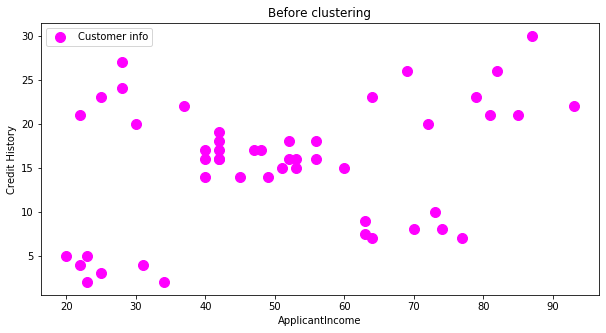

In [41]:
# Visualise the data using Scatter plot
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize=(10,5))
plt.scatter(x,y, s=100, c ='magenta', label = 'Customer info')

plt.title('Before clustering')
plt.xlabel('ApplicantIncome')
plt.ylabel('Credit History')
plt.legend()
plt.show()

In [42]:
# Fit and Transform the data for MinMax normalization
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX = scaler.fit_transform(x) 

In [43]:
# import KMeans for clustering
from sklearn.cluster import KMeans


In [47]:
# Fit the input data. Create labels and get inertia

wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(x)
y_means

array([2, 3, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 3, 2, 3, 0, 0, 1, 3, 2, 1, 0,
       3, 0, 0, 1, 3, 3, 1, 3, 1, 1, 0, 3, 3, 1, 0, 3, 0, 2, 1, 0, 0, 3,
       2, 3, 3, 1, 2])

Text(0, 0.5, 'Squared Sum (Inertia)')

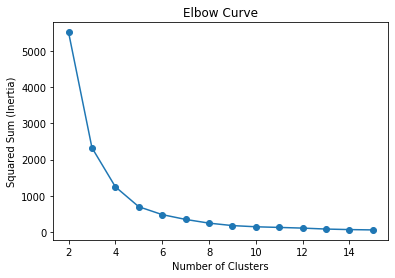

In [50]:
# Visualise the clusters
inertia = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt

plt.plot(range(2,16), inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Squared Sum (Inertia)')


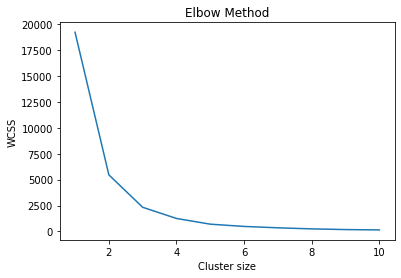

In [46]:
# Elbow method to determine optimum clusters
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster size')
plt.ylabel('WCSS')
plt.show()